In [ ]:
# Install apache-beam with pip.
%pip install --quiet apache-beam


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import apache_beam as beam

In [8]:
inputs = [0,1,2,3,4,5,6]

# create a pipeline
with beam.Pipeline() as pipeline:
    # Feed it some input elements with "Create".
    outputs = (
        pipeline
        | "Create initial values" >> beam.Create(inputs)
    )

    # `outputs` is a PCollection with our input elements.
    # But printing it directly won't show us its contents
    print(f'outputs: {outputs}')

outputs: PCollection[[8]: Create initial values/Map(decode).None]


> ℹ️ In Beam, you can __NOT__ access the elements from a `PCollection` directly like a Python list.
> This means, we can't simply `print` the output `PCollection` to see the elements.
>
> This is because, depending on the runner,
> the `PCollection` elements might live in multiple worker machines.

To print the elements in the PCollection, we'll do a little trick, but we'll explain it shortly.

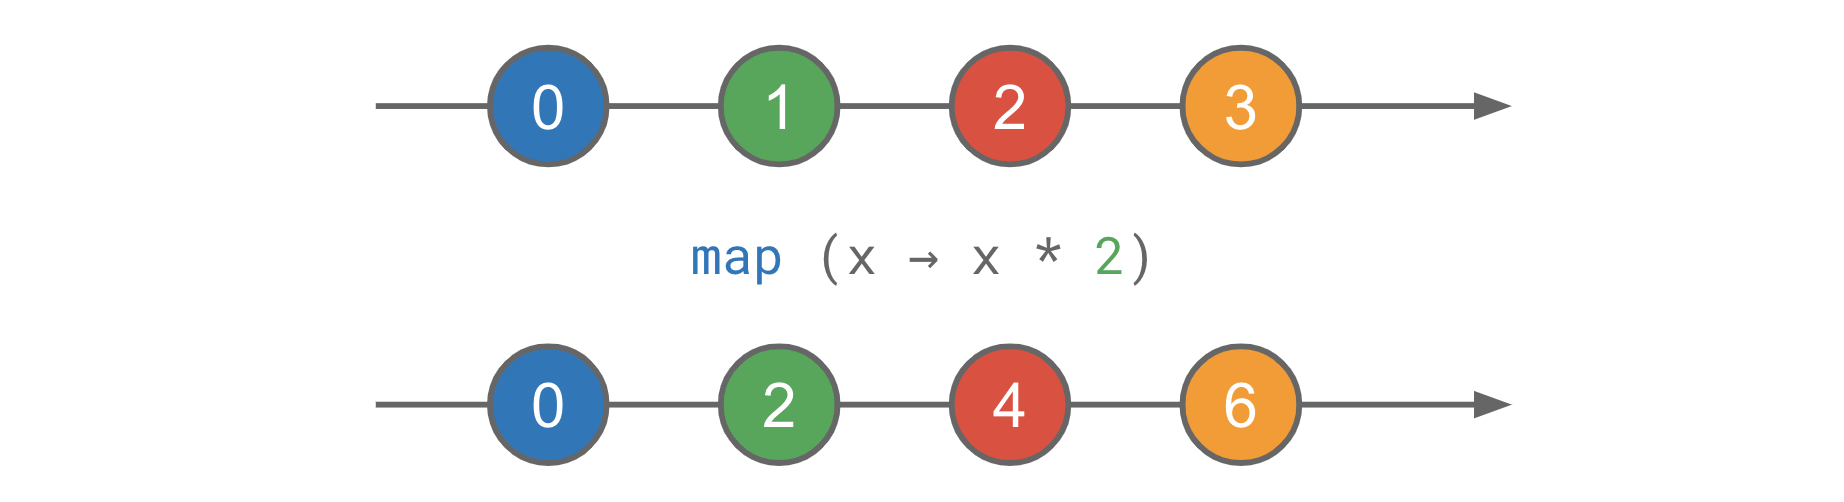

In [9]:
inputs = [0,1,2,3,4,5,6]

# create a pipeline
with beam.Pipeline() as pipeline:
    # Feed it some input elements with "Create".
    outputs = (
        pipeline
        | "Create initial values" >> beam.Create(inputs)
    )

    # We can only access the elements through another transform.
    outputs | "print result" >> beam.Map(print)

0
1
2
3
4
5
6


In [12]:
inpputs = [0,1,2,3,4]

# using the 'map' function
outputs = map(lambda x: x*2, inputs)
print(outputs)
print(list(outputs))

[0, 2, 4, 6, 8, 10, 12]


In [13]:
inpputs = [0,1,2,3,4]

# Using a list comprehension
outputs = [x*2 for x in inputs]
print(outputs)

[0, 2, 4, 6, 8, 10, 12]


In [14]:
inpputs = [0,1,2,3,4]

# Roughly equivalent for loop
outputs = []
for x in inputs:
    outputs.append(x*2)
print(outputs)

[0, 2, 4, 6, 8, 10, 12]


In [ ]:
inpputs = [0,1,2,3,4]

with beam.Pipeline() as pipeline:
    outputs = (
        pipeline
        | 'Create values' >> beam.Create(inputs)
        | 'Multiply by 2' >> beam.Map(lambda x:x*2)
    )

    outputs | beam.Map(print)

0
2
4
6
8
10
12
